# INSTALL DEPENDENCIES

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [64]:
colorImgBgr = cv2.imread(r'../../Downloads/download.png')
grayImg = cv2.imread(r'../../Downloads/puppy.jpeg', cv2.IMREAD_GRAYSCALE)

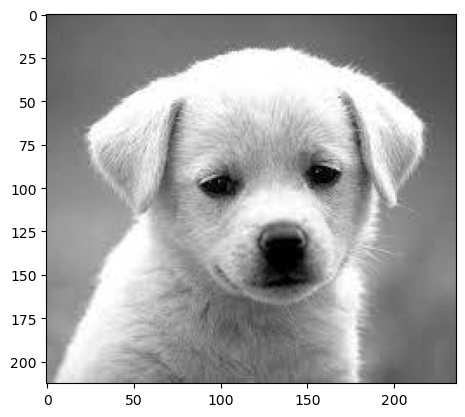

In [65]:
plt.imshow(grayImg, cmap='gray')

In [66]:
import matplotlib as mpl
def displayImageInActualSize(img):
    dpi = mpl.rcParams['figure.dpi']
    H, W = img.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    plt.show

def displayImageInActualSizeColor(img):
    dpi = mpl.rcParams['figure.dpi']
    H, W = img.shape[0:2]
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img)
    plt.show

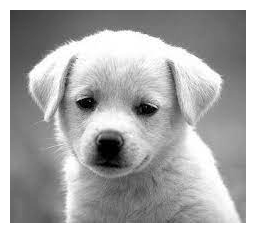

In [67]:
displayImageInActualSize(grayImgBGR_2)

# BILINEAR TRANSFORMATION

In [68]:
def f_bilinearInterpolate(row, col, I):
    leftCol = int(col)
    rightCol = leftCol + 1
    widthLeft = col - leftCol
    widthRight = rightCol - col
    topRow = int(row)
    bottomRow = topRow + 1
    widthTop = row - topRow
    widthBottom = bottomRow - row
    if topRow >= 0 and bottomRow < I.shape[0] and leftCol >= 0 and rightCol < I.shape[1]:
        a = I[topRow, leftCol] * widthRight + I[topRow, rightCol] * widthLeft
        b = I[bottomRow, leftCol] * widthRight + I[bottomRow, rightCol] * widthLeft
        g = widthTop * b + widthBottom * a
        return np.uint8(g)
    else:
        return 0

# ROTATION IMPLEMENTATION

In [150]:
a = -45 # degrees
cosA = np.cos(np.deg2rad(a))
sinA = np.sin(np.deg2rad(a))
R = np.array([[cosA, -sinA], [sinA, cosA]])
rMax, cMax = grayImgBGR.shape[0], grayImgBGR.shape[1]
coords = np.array([[0,0], [0, cMax - 1], [rMax - 1, 0], [rMax - 1, cMax -1]])
A_dash = R.dot(coords.T)
mins = A_dash.min(axis=1)
maxs = A_dash.max(axis=1)
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))
H, W = maxR - minR + 1, maxC - minC + 1
newImage = np.ones((H, W), dtype='uint8') * 255

In [155]:
Tinv = np.linalg.inv(R)
numRows = grayImgBGR.shape[0]
numCols = grayImgBGR.shape[1]

In [156]:
for new_i in range(minR, maxR):
   for new_j in range(minC, maxC):
       P_dash = np.array([new_i, new_j])
       P = Tinv.dot(P_dash)
       i, j = P[0], P[1]
       if i<0 or i>=numRows or j<0 or j >= numCols:
           pass
       else:
           g = f_bilinearInterpolate_teacher(i, j, grayImgBGR)
           newImage[new_i - minR, new_j - minC] = g

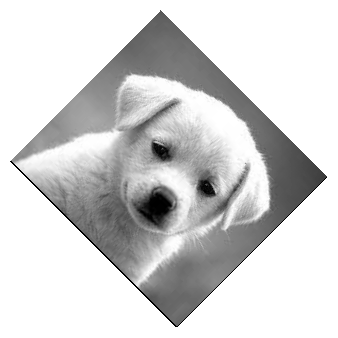

In [157]:
displayImageInActualSize(newImage)

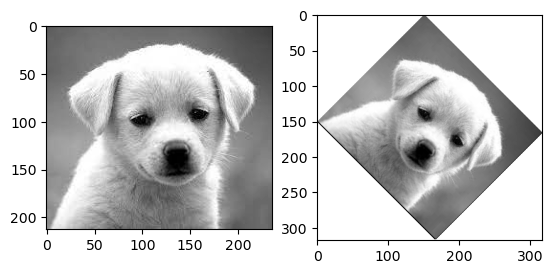

In [158]:
plt.subplot(121)
plt.imshow(grayImgBGR, cmap='gray')
plt.subplot(122)
plt.imshow(newImage, cmap='gray')

In [174]:
def f_getExtents(T, rMax, cMax):
    coords = np.array([[0,0], [0, cMax - 1], [rMax - 1, 0], [rMax - 1, cMax -1]])
    A_dash = T.dot(coords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H, W = maxR - minR + 1, maxC - minC + 1
    return minR, minC, maxR, maxC, H, W

In [181]:
def f_transform(T, grayImg):
    rMax, cMax = grayImg.shape[0], grayImg.shape[1]
    minR, minC, maxR, maxC, H, W = f_getExtents(T, rMax, cMax)
    transformImg = np.ones((H, W), dtype='uint8')*255
    Tinv = np.linalg.inv(T)
    for new_i in range(minR, maxR):
        for new_j in range(minC, maxC):
            P_dash = np.array([new_i, new_j])
            P = Tinv.dot(P_dash)
            i, j = P[0], P[1]
            if i<0 or i>=rMax or j<0 or j >= cMax:
               pass
            else:
               g = f_bilinearInterpolate_teacher(i, j, grayImg)
               transformImg[new_i - minR, new_j - minC] = g
    return transformImg

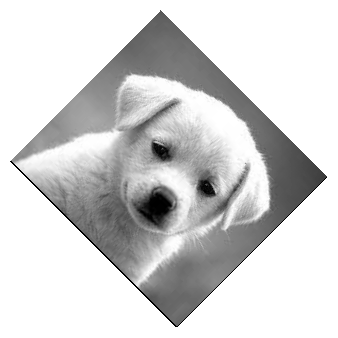

In [182]:
plt.subplot(121)
plt.imshow

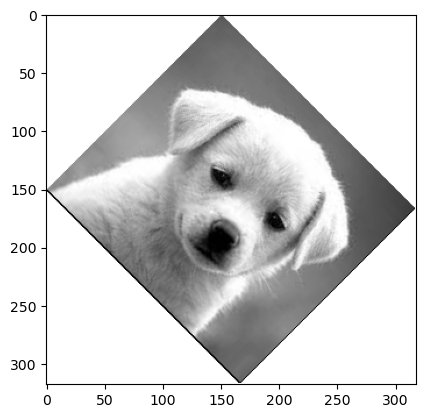

In [183]:
plt.imshow(f_transform(R, grayImgBGR), cmap='gray')